In [26]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=True

import matplotlib as mpl
mpl.rcParams.update(
    {
    'text.usetex': False,
    'font.family': 'stixgeneral',
    'mathtext.fontset': 'stix',
    }
)

In [32]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
from pprint import pprint
import pandas as pd

In [28]:
# 加载数据 - 只要没有进行插值
data = []
feature_method = ['MI']
is_inter = ['False','True']
for f in feature_method:
    for inter in is_inter:
        data.append(np.load('./np_cluster/np_{}_{}.npy'.format(f,inter)))

In [30]:
# 去除数据中的最后一列，获得用于聚类的数据
def split_data(data):
    return data[:,0:54]

def standard_data(data):
    print('data:{}'.format(data.shape))
    scaler = StandardScaler()
    np1 = scaler.fit_transform(data[:,0:2])
    np2 = data[:,2:4]
    np3 = scaler.fit_transform(data[:,4:])
    ans = np.hstack((np1,np2,np3))
    print('scale_data:{}'.format(ans.shape))
    return ans

In [33]:
code = {
    0:'MI(without Interpolation)',
    1:'MI(with Interpolation)',
}
k_arr = [15,15]
score = {}
for idx,data_item in enumerate(data):
    print('-----{}-----'.format(idx))
    cluster_data = split_data(data_item)
    cluster_data = standard_data(cluster_data)
    print('cluster_data:{}'.format(cluster_data.shape))
    score[code[idx]] = {}
    model = KMeans(n_clusters=k_arr[idx],init='k-means++',max_iter=4000).fit(cluster_data)
    score[code[idx]]['SC'] = silhouette_score(cluster_data,model.labels_)
    score[code[idx]]['CH'] = calinski_harabasz_score(cluster_data,model.labels_)
    score[code[idx]]['DB'] = davies_bouldin_score(cluster_data,model.labels_)

-----0-----
data:(3205, 54)
scale_data:(3205, 54)
cluster_data:(3205, 54)
-----1-----
data:(3205, 54)
scale_data:(3205, 54)
cluster_data:(3205, 54)


In [34]:
pprint(score)

{'MI(with Interpolation)': {'CH': 433.777973778243,
                            'DB': 1.0533260460780574,
                            'SC': 0.28568683698217123},
 'MI(without Interpolation)': {'CH': 426.2852316126521,
                               'DB': 1.0304246297238897,
                               'SC': 0.2886724251461247}}


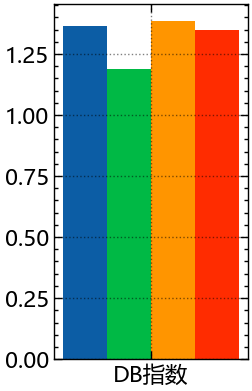

In [41]:
xNames = ['DB指数']
x = np.arange(1)

with plt.style.context(['science','grid','notebook']):
    fig= plt.figure(figsize=(2.5,4.7),dpi=100)
#     plt.ylim([0,1])
    plt.bar(x-0.4,[1.3661],width=0.2,label='MI-Kmeans++',align='edge')
    plt.bar(x-0.2,[1.1890],width=0.2,label='MI-SC',align='edge')
    plt.bar(x,[1.3842],width=0.2,label='MI-Kmeans++(无融合特征)',align='edge')
    plt.bar(x+0.2,[1.3500],width=0.2,label='MI-SC(无融合特征)',align='edge')
#     plt.xlabel(r'$ratio$',fontdict={'size':14})
#     plt.ylabel(r'$mean\ squared\ error$',fontdict={'size':14})
    plt.xticks(x, xNames)#rotation控制倾斜角度
#     plt.legend(loc='upper right',prop={'size':12},ncol=4)
    plt.show()

In [54]:
dist_mat_drop = pd.read_excel('./np_cluster/deparment_dist_1.xlsx')

In [55]:
dist_mat_drop.head()

,妇产科病区,心血管病区,普通外科病区,普通胸外科病区,泌尿外科中心病区,神经外科病区,耳鼻咽喉科病区,肝胆外科病区,骨科病区
0,1.0000,0.2385,0.7782,0.2360,0.3465,0.5590,0.3062,0.7481,0.2199
1,0.2385,1.0000,0.3799,0.1238,0.1794,0.3560,0.1120,0.3609,0.3647
2,0.7782,0.3799,1.0000,0.3730,0.4619,0.7554,0.3301,0.7790,0.5830
3,0.2360,0.1238,0.3730,1.0000,0.1573,0.2584,0.1097,0.3417,0.3424
4,0.3465,0.1794,0.4619,0.1573,1.0000,0.3504,0.1507,0.5074,0.4555


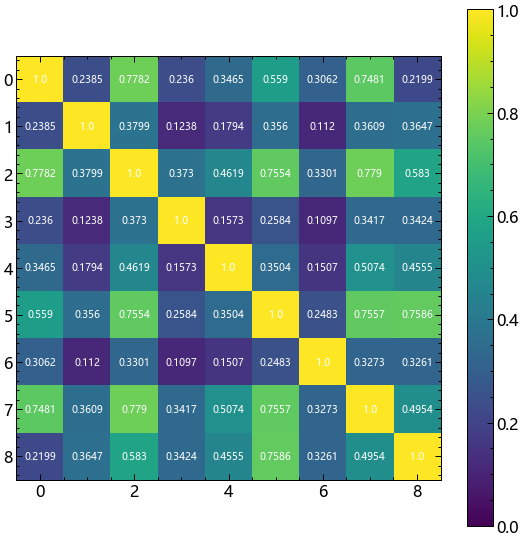

In [56]:
with plt.style.context(['science','notebook']):
    map_data = dist_mat_drop.values.astype(float)
    map_data = np.around(map_data,4)
#     plt.figure(figsize=(7.5,5.5),dpi=100)
    fig,ax = plt.subplots(figsize=(9.5,9.5))
    plt.imshow(map_data,vmin=0.0,vmax=1.0)
    for i in range(9):
        for j in range(9):
            text = ax.text(j,i,map_data[i,j],ha="center", va="center", color="w")
    plt.colorbar()
    plt.show()